In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("tips.csv", na_values=['NULL','?','NONE'])
df = shuffle(df)

In [3]:
df.shape

(244, 7)

In [4]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 205 to 19
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         240 non-null    float64
 2   sex         243 non-null    object 
 3   smoker      240 non-null    object 
 4   day         242 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [6]:
# select numerical columns
df.select_dtypes(exclude='object').columns

Index(['total_bill', 'tip', 'size'], dtype='object')

In [7]:
# select object only
df.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [8]:
df.select_dtypes(exclude='object').describe().round(2)

,total_bill,tip,size
count,244.00,240.00,244.00
mean,19.79,2.97,2.57
std,8.90,1.41,0.95
min,3.07,0.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.86,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


/Users/imac/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

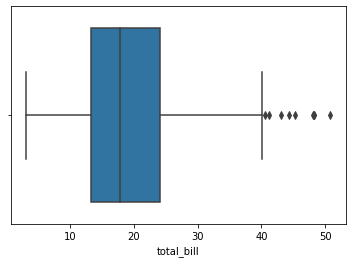

In [9]:
sns.boxplot(df['total_bill'])

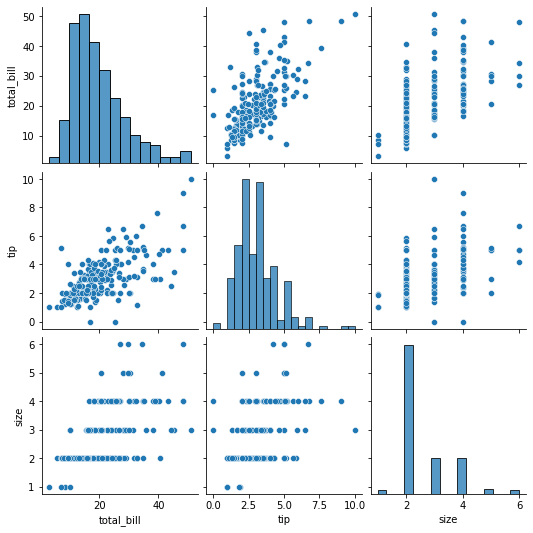

In [10]:
sns.pairplot(df.select_dtypes(exclude='object'))

In [11]:
df.select_dtypes(include=['object']).columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [12]:
df.select_dtypes(include=['object']).nunique()

sex       3
smoker    2
day       4
time      2
dtype: int64

In [13]:
# Print Unique features
col = df.select_dtypes(include=['object']).columns
for i in col:
    print('{}:{}'.format(i,df[i].unique()))

sex:['Female' 'Male' 'M' nan]
smoker:['Yes' 'No' nan]
day:[nan 'Thur' 'Fri' 'Sat' 'Sun']
time:['Lunch' 'Dinner']


In [14]:
# number of instances for days of week
df['day'].value_counts()

Sat     87
Sun     76
Thur    61
Fri     18
Name: day, dtype: int64

<AxesSubplot:>

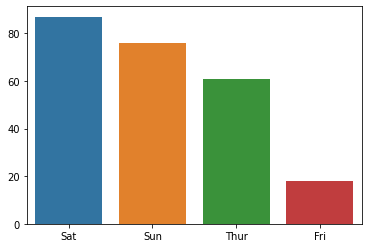

In [15]:
day_cnt = df['day'].value_counts()
sns.barplot(x=day_cnt.index, y=day_cnt.values)

In [16]:
day_cnt.index

Index(['Sat', 'Sun', 'Thur', 'Fri'], dtype='object')

In [17]:
df.info() # see missing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 205 to 19
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         240 non-null    float64
 2   sex         243 non-null    object 
 3   smoker      240 non-null    object 
 4   day         242 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [18]:
# a better way
print(df.isnull().sum())

total_bill    0
tip           4
sex           1
smoker        4
day           2
time          0
size          0
dtype: int64


In [19]:
# sorted
print(df.isnull().sum().sort_values(ascending=False))

smoker        4
tip           4
day           2
sex           1
size          0
time          0
total_bill    0
dtype: int64


In [20]:
# Tip missing data via gender mean
df['tip'].fillna(df.groupby('sex')['tip'].transform('mean'),inplace=True)

In [21]:
# sorted
print(df.isnull().sum().sort_values(ascending=False))

smoker        4
day           2
sex           1
size          0
time          0
tip           0
total_bill    0
dtype: int64


In [22]:
# forward fill, fills missing value from previous entry
df.loc[:,'smoker']=df.loc[:,'smoker'].ffill()
df.loc[:,'day']=df.loc[:,'day'].ffill()

In [23]:
# sorted
print(df.isnull().sum().sort_values(ascending=False))

day           1
sex           1
size          0
time          0
smoker        0
tip           0
total_bill    0
dtype: int64


In [36]:
# Address Nan in sex
df['sex'].fillna(method='bfill',inplace=True)

In [25]:
# Check for uniques again
for i in col:
    print('{}:{}'.format(i,df[i].unique()))

sex:['Female' 'Male' 'M' nan]
smoker:['Yes' 'No']
day:[nan 'Thur' 'Fri' 'Sat' 'Sun']
time:['Lunch' 'Dinner']


In [26]:
# Take care of sex
df['sex'].replace({'M':"Male"}, inplace=True)

In [27]:
# Check for uniques again
for i in col:
    print('{}:{}'.format(i,df[i].unique()))

sex:['Female' 'Male' nan]
smoker:['Yes' 'No']
day:[nan 'Thur' 'Fri' 'Sat' 'Sun']
time:['Lunch' 'Dinner']


In [28]:
# Address Nan 






<AxesSubplot:>

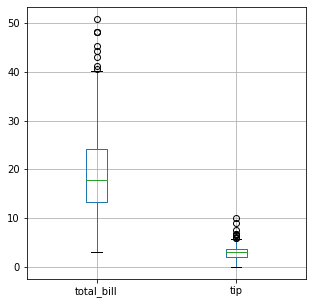

In [29]:
# Outliers 1.5*IQR
df.boxplot(['total_bill','tip'],figsize=(5,5))

In [30]:
for i in ['total_bill','tip']:
    q75, q25 = np.percentile(df.loc[:,i],[75,25])
    IQR = q75 - q25
    max = q75 + 1.5*IQR
    min = q25 - 1.5*IQR
    df.loc[df[i] > max, i] = df[i].mean()
    df.loc[df[i] < min, i] = df[i].mean()

<AxesSubplot:>

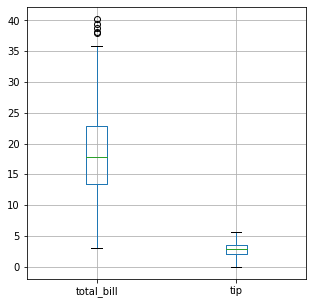

In [31]:
# left over were items less than 1.5*IQR
df.boxplot(['total_bill','tip'],figsize=(5,5))

In [32]:
# create dummy variables
df = pd.concat([df,pd.get_dummies(df[['time','day']])],axis=1)

In [33]:
df

,total_bill,tip,sex,smoker,day,time,size,time_Dinner,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur
205,16.47,3.23,Female,Yes,NaN,Lunch,3,0,1,0,0,0,0
80,19.44,3.00,Male,Yes,Thur,Lunch,2,0,1,0,0,0,1
91,22.49,3.50,Male,No,Fri,Dinner,2,1,0,1,0,0,0
67,3.07,1.00,Female,Yes,Sat,Dinner,1,1,0,0,1,0,0
187,30.46,2.00,Male,Yes,Sun,Dinner,5,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,24.27,2.03,Male,Yes,Sat,Dinner,2,1,0,0,1,0,0
186,20.90,3.50,Female,Yes,Sun,Dinner,3,1,0,0,0,1,0
43,9.68,1.32,Male,No,Sun,Dinner,2,1,0,0,0,1,0
116,29.93,5.07,Male,No,Sun,Dinner,4,1,0,0,0,1,0


In [34]:
# Create an instance of LabelEncoder
lbcode = LabelEncoder()

In [38]:
# df['sex'][1] had to recode NaN value
df['sex'] = lbcode.fit_transform(df['sex'])

<AxesSubplot:>

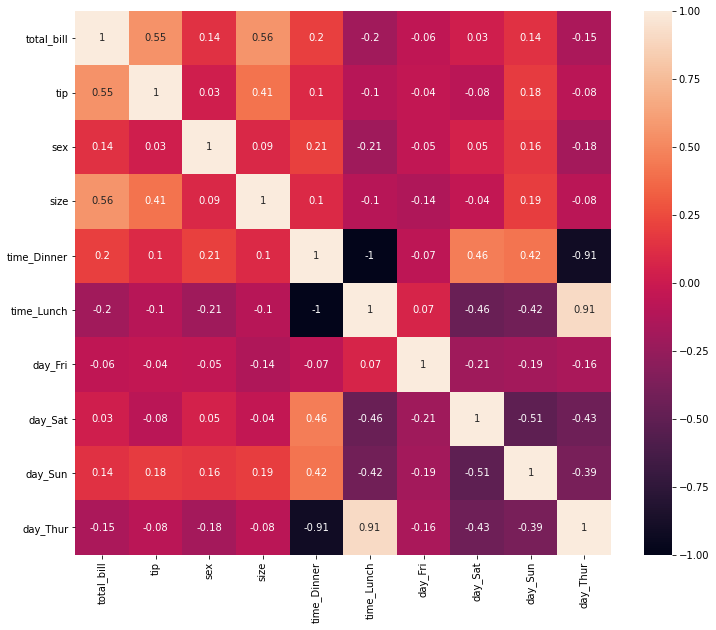

In [39]:
cor = df.corr().round(2)
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True)

In [40]:
cor.sort_values(['total_bill'],ascending=False,inplace=True)
cor.total_bill

total_bill     1.00
size           0.56
tip            0.55
time_Dinner    0.20
sex            0.14
day_Sun        0.14
day_Sat        0.03
day_Fri       -0.06
day_Thur      -0.15
time_Lunch    -0.20
Name: total_bill, dtype: float64

In [41]:
cor.sort_values(['tip'],ascending=False,inplace=True)
cor.tip

tip            1.00
total_bill     0.55
size           0.41
day_Sun        0.18
time_Dinner    0.10
sex            0.03
day_Fri       -0.04
day_Sat       -0.08
day_Thur      -0.08
time_Lunch    -0.10
Name: tip, dtype: float64

## Modeling Stage

In [42]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,time_Dinner,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur
205,16.47,3.23,0,Yes,NaN,Lunch,3,0,1,0,0,0,0
80,19.44,3.00,1,Yes,Thur,Lunch,2,0,1,0,0,0,1
91,22.49,3.50,1,No,Fri,Dinner,2,1,0,1,0,0,0


### Linear Regression

In [85]:
# Selecting train/test features
#del(X,y,y_pred,X_train,X_test,y_train,y_test)
X = df.loc[:,['total_bill','size']].values # predict total_bill from tip
y = df.loc[:,'tip'].values

# X = df.iloc[:,[0,6]].values # predict total_bill from tip
# y = df.iloc[:,1:2].values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [88]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)

In [89]:
# store in dataframe (not required)
result = pd.DataFrame(
                    {
                        "y_test":y_test.ravel(),
                        "y_pred":y_pred.ravel()
                    }
                ) # y_test is an array of arrays, ravel flattens it
#result.head(10)
mse = mean_squared_error(y_test,y_pred)
print(mse)

0.7205286744461478


In [90]:
print(lreg.coef_,lreg.intercept_)
# y = a1x1 + a2x2 + b
# y = 0.071x1 + 0.14x2 + 1.12

[0.07429569 0.11333091] 1.1131254518338998


### Logistic Regression

In [91]:
# predict sex based on bill, tip and size
df

,total_bill,tip,sex,smoker,day,time,size,time_Dinner,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur
205,16.47,3.23,0,Yes,NaN,Lunch,3,0,1,0,0,0,0
80,19.44,3.00,1,Yes,Thur,Lunch,2,0,1,0,0,0,1
91,22.49,3.50,1,No,Fri,Dinner,2,1,0,1,0,0,0
67,3.07,1.00,0,Yes,Sat,Dinner,1,1,0,0,1,0,0
187,30.46,2.00,1,Yes,Sun,Dinner,5,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,24.27,2.03,1,Yes,Sat,Dinner,2,1,0,0,1,0,0
186,20.90,3.50,0,Yes,Sun,Dinner,3,1,0,0,0,1,0
43,9.68,1.32,1,No,Sun,Dinner,2,1,0,0,0,1,0
116,29.93,5.07,1,No,Sun,Dinner,4,1,0,0,0,1,0


<AxesSubplot:>

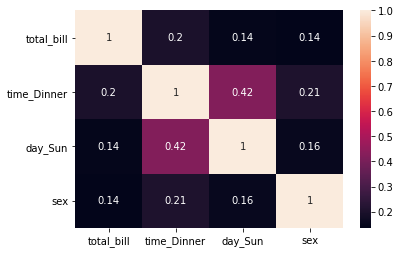

In [107]:
cor2 = df[['total_bill','time_Dinner','day_Sun','sex']].corr()
sns.heatmap(cor2, annot=True)

In [102]:
del(X,y,X_train,X_test,y_train,y_test)
X = df.loc[:,['total_bill','tip','size']].values
y = df.loc[:,'sex'].values

In [103]:
lgreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
lgreg.fit(X_train, y_train.ravel())
threshold = 0.5
y_pred = lgreg.predict(X_test)

In [104]:
tmp1 = pd.DataFrame(y_pred,columns=['y_pred'])
tmp2 = pd.DataFrame(y_test,columns=['y_test'])
result = pd.concat( [tmp1,tmp2],axis=1)
result.head(6)

,y_pred,y_test
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0
5,1,0


<AxesSubplot:>

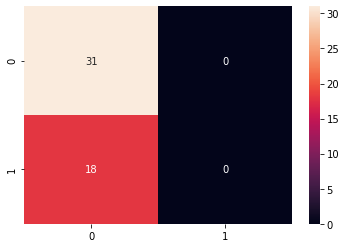

In [105]:
cm = confusion_matrix(y_test,y_pred, labels = [1,0])
sns.heatmap(cm, annot=True)

In [109]:
# 0: precision TN/(TN+FN), recall TN/(TN+FP)  Recall should be close to 1
# 1: precision TP/(TP+FP), recall TP/(TP+FN) 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.63      1.00      0.78        31

    accuracy                           0.63        49
   macro avg       0.32      0.50      0.39        49
weighted avg       0.40      0.63      0.49        49



/Users/imac/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [127]:
del(y_test,y_pred)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
result = pd.DataFrame({"y_test":y_test.ravel(), "y_pred":y_pred.ravel()})

In [128]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[ 6 12]
 [ 9 22]]
              precision    recall  f1-score   support

           0       0.40      0.33      0.36        18
           1       0.65      0.71      0.68        31

    accuracy                           0.57        49
   macro avg       0.52      0.52      0.52        49
weighted avg       0.56      0.57      0.56        49



### Naive Bayes

In [131]:
del(y_test,y_pred,cm)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
nb = GaussianNB()
nb.fit(X_train, y_train.ravel())
y_pred = nb.predict(X_test)
result = pd.DataFrame({"y_test":y_test.ravel(), "y_pred":y_pred.ravel()})

In [132]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[ 0 18]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.60      0.87      0.71        31

    accuracy                           0.55        49
   macro avg       0.30      0.44      0.36        49
weighted avg       0.38      0.55      0.45        49



## SVM

In [148]:
del(y_test,y_pred,cm)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train.ravel())
y_pred = svm.predict(X_test)
result = pd.DataFrame({"y_test":y_test, "y_pred":y_pred.ravel()})

In [149]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[ 0 18]
 [ 0 31]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.63      1.00      0.78        31

    accuracy                           0.63        49
   macro avg       0.32      0.50      0.39        49
weighted avg       0.40      0.63      0.49        49



/Users/imac/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [150]:
del(y_test,y_pred,cm)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train.ravel())
y_pred = knn.predict(X_test)
result = pd.DataFrame({"y_test":y_test, "y_pred":y_pred.ravel()})

In [151]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[ 4 15]
 [ 8 22]]
              precision    recall  f1-score   support

           0       0.33      0.21      0.26        19
           1       0.59      0.73      0.66        30

    accuracy                           0.53        49
   macro avg       0.46      0.47      0.46        49
weighted avg       0.49      0.53      0.50        49



### Random Forest

In [152]:
del(y_test,y_pred,cm)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.ravel())
y_pred = rfc.predict(X_test)
result = pd.DataFrame({"y_test":y_test, "y_pred":y_pred.ravel()})

In [153]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[ 4 16]
 [ 9 20]]
              precision    recall  f1-score   support

           0       0.31      0.20      0.24        20
           1       0.56      0.69      0.62        29

    accuracy                           0.49        49
   macro avg       0.43      0.44      0.43        49
weighted avg       0.45      0.49      0.46        49



### XGBoost

In [154]:
del(y_test,y_pred,cm)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
xg = XGBClassifier(use_label_encoder=False)
xg.fit(X_train, y_train.ravel())
y_pred = nb.predict(X_test)
result = pd.DataFrame({"y_test":y_test, "y_pred":y_pred.ravel()})

In [155]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[ 4 17]
 [ 1 27]]
              precision    recall  f1-score   support

           0       0.80      0.19      0.31        21
           1       0.61      0.96      0.75        28

    accuracy                           0.63        49
   macro avg       0.71      0.58      0.53        49
weighted avg       0.69      0.63      0.56        49

